# Avaliação 2 - Métodos Numéricos
### Nomes e DREs:
- Raphael Mauricio Sanches de jesus - 124062300
- Wladimir Augusto Pereira das Neves - 124062562

---

## Instruções
Este notebook contém as respostas e soluções para a Avaliação 2. Cada questão é apresentada com uma explicação, seguida do código implementado por nos mesmos entao correspondente e gráficos, quando aplicável. Por motivo de comparacao de solucao utilizamos tambem as bibiotecas prontas em um segundo momento.

---

## Questão 1

**(a) Três métodos para determinar o polinômio interpolador**  

**1\. Interpolação de Lagrange**  

Características: Usa uma combinação linear de funções base para criar um polinômio que passa por todos os pontos dados.  

Vantagens: Fácil de implementar e entender, útil para um número pequeno de pontos.  

Desvantagens: Aumenta o custo computacional para grande número de pontos e sofre do problema de instabilidade (efeito Runge) para dados igualmente espaçados e um número elevado de pontos.  

**2\. Interpolação de Newton**  

Características: Usa diferenças divididas, facilitando a adição de novos pontos sem recalcular o polinômio completo.  

Vantagens: Mais eficiente para atualizar o polinômio quando novos pontos são adicionados.  

Desvantagens: Para grande número de pontos, o cálculo das diferenças divididas pode ser trabalhoso e está sujeito a problemas de precisão numérica.  

**3\. Interpolação por Splines**  

Características: Divide o intervalo de pontos em subintervalos e utiliza funções polinomiais de grau menor (geralmente cúbicos) em cada subintervalo.  

Vantagens: Evita o problema de oscilação de alta frequência e fornece um polinômio suave que passa por todos os pontos.  

Desvantagens: O cálculo envolve resolver sistemas de equações lineares, podendo ser complexo, e não fornece um único polinômio para todo o intervalo.  

**(b) Definição de Spline Cúbico e suas propriedades**  

Um spline cúbico éuma função interpoladora composta por uma série de polinômios cúbicos definidos em subintervalos entre pontos consecutivos de um conjunto de dados. Ele é construído de forma que o spline e suas duas primeiras derivadas sejam contínuas em todos os pontos de dados.  

**Propriedades do spline cúbico:**  

Continuidade da função S(x) e de suas primeiras e segundas derivadas S'(x) e S''(x) nos pontos de interpolação.  

Cada polinômio cúbico definido entre dois pontos adjacentes minimiza a curvatura total da função interpoladora, resultando em uma curva suave.  

Em geral, exige a definição de condições de contorno para determinar uma solução única (condições naturais, amarradas ou periódicas).   
**(c) Garantia de que S''(x) \= f''(x) no spline cúbico**  

No caso do spline cúbico S(x) que interpola pontos (x\_i, f(x\_i)), onde f(x) éuma função suave, não se pode garantir que S''(x) \= f''(x) em todos os pontos, exceto nos pontos de interpolação e dependendo das condições de contorno aplicadas. O spline cúbico aproxima bem a segunda derivada da função original nos pontos de interpolação, mas não há garantia de que será exatamente igual à segunda derivada de f(x) em todos os pontos do intervalo.

## Questão 2



**Spline Cúbica Livre para Aproximação da Função f(x) \= cos(πx)**  
Para construir uma spline cúbica livre que aproxima a função f(x) \= cos(πx) passando pelos pontos x \= 0, x \= 1/4, x \= 1/2, x \= 3/4, e x \= 1, seguimos os seguintes passos:

**1\. Definir os Pontos de Interpolação**  
Os pontos de interpolação e seus valores f(x) \= cos(πx) são:

x\_0 \= 0,   f(x\_0) \= cos(0) \= 1  
x\_1 \= 1/4, f(x\_1) \= cos(π/4) \= √2/2 ≈ 0.7071  
x\_2 \= 1/2, f(x\_2) \= cos(π/2) \= 0  
x\_3 \= 3/4, f(x\_3) \= cos(3π/4) \= \-√2/2 ≈ \-0.7071  
x\_4 \= 1,   f(x\_4) \= cos(π) \= \-1

**2\. Intervalos e Definição das Splines**  
Queremos construir splines cúbicas para os intervalos \[x\_0, x\_1\], \[x\_1, x\_2\], \[x\_2, x\_3\], \[x\_3, x\_4\].

Para cada intervalo \[x\_i, x\_{i+1}\], definimos uma função cúbica:

S\_i(x) \= a\_i \+ b\_i(x \- x\_i) \+ c\_i(x \- x\_i)^2 \+ d\_i(x \- x\_i)^3

**3\. Sistema Linear para c\_i**  
Para garantir a continuidade da derivada segunda, criamos um sistema linear para calcular os valores de c\_i. As condições naturais implicam que c\_0 \= 0 e c\_4 \= 0\.

Para os pontos internos x\_1, x\_2, e x\_3, as equações são:

0.25 \* c\_0 \+ 1.0 \* c\_1 \+ 0.25 \* c\_2 \= \-4.9706  
0.25 \* c\_1 \+ 1.0 \* c\_2 \+ 0.25 \* c\_3 \= 0  
0.25 \* c\_2 \+ 1.0 \* c\_3 \+ 0.25 \* c\_4 \= 4.9706

O sistema resultante para c\_1, c\_2, e c\_3 é:  
\[ 1   0.25   0  \] \[c\_1\] \= \[-4.9706\]  
\[0.25  1    0.25\] \[c\_2\] \= \[  0    \]  
\[ 0   0.25   1  \] \[c\_3\] \= \[ 4.9706\]

**4\. Coeficientes da Spline Cúbica**  
Com os valores de c\_i obtidos, os coeficientes para cada spline são:

S\_0(x) para x ∈ \[0, 1/4\]:  
a\_0 \= 1.0, b\_0 \= \-0.7574, c\_0 \= 0.0, d\_0 \= \-6.6274  
S\_0(x) \= 1.0 \- 0.7574x \- 6.6274x^3

S\_1(x) para x ∈ \[1/4, 1/2\]:  
a\_1 \= 0.7071, b\_1 \= \-2.0, c\_1 \= \-4.9706, d\_1 \= 6.6274  
S\_1(x) \= 0.7071 \- 2.0(x \- 1/4) \- 4.9706(x \- 1/4)^2 \+ 6.6274(x \- 1/4)^3

S\_2(x) para x ∈ \[1/2, 3/4\]:  
a\_2 \= 0.0, b\_2 \= \-3.2426, c\_2 \= 0.0, d\_2 \= 6.6274  
S\_2(x) \= 0.0 \- 3.2426(x \- 1/2) \+ 6.6274(x \- 1/2)^3

S\_3(x) para x ∈ \[3/4, 1\]:  
a\_3 \= \-0.7071, b\_3 \= \-2.0, c\_3 \= 4.9706, d\_3 \= \-6.6274  
S\_3(x) \= \-0.7071 \- 2.0(x \- 3/4) \+ 4.9706(x \- 3/4)^2 \- 6.6274(x \- 3/4)^3

**5\. Integral da Spline no Intervalo \[0, 1\]**  
Para calcular o valor da integral da spline no intervalo \[0, 1\], integramos cada segmento separadamente e somamos os resultados:

∫\_0^1 S(x) dx ≈ 0

Esse resultado é consistente com a função f(x) \= cos(πx), que também tem integral zero no intervalo \[0, 1\].

**Aproximação das Derivadas Primeira e Segunda usando Spline Cúbica**  
Para aproximar as derivadas primeira \\( f'(0.5) \\) e segunda \\( f''(0.5) \\) da função \\( f(x) \= \\cos(\\pi x) \\) utilizando a spline cúbica, usamos o polinômio do segmento correspondente ao intervalo em que \\( x \= 0.5 \\) se encontra, que é o intervalo \\( \[\\frac{1}{4}, \\frac{1}{2}\] \\):

O polinômio para o intervalo \[1/4, 1/2\] é:

S\_1(x) \= 0.7071 \- 2.0(x \- 1/4) \- 4.9706(x \- 1/4)^2 \+ 6.6274(x \- 1/4)^3

Calculamos as derivadas de S\_1(x) para obter as aproximações \\( S\_1'(0.5) \\) e \\( S\_1''(0.5) \\), e as comparamos com as derivadas reais da função \\( f(x) \= \\cos(\\pi x) \\):

f'(x) \= \-\\pi \\sin(\\pi x)  
f''(x) \= \-\\pi^2 \\cos(\\pi x)

Substituindo \\( x \= 0.5 \\) nos resultados, temos:

**Resultados**

Aproximação da primeira derivada f'(0.5):  
S\_1'(0.5) ≈ \-3.2427  
Valor real: f'(0.5) \= \-π ≈ \-3.1416

Aproximação da segunda derivada f''(0.5):  
S\_1''(0.5) ≈ \-0.0001  
Valor real: f''(0.5) \= 0

**Comparação**  
A primeira derivada \\( S\_1'(0.5) \\) aproxima bem o valor real, com um pequeno erro. A segunda derivada \\( S\_1''(0.5) \\) também é próxima ao valor real, mas apresenta uma pequena variação negativa devido aos arredondamentos numéricos e à forma da spline nesse intervalo.




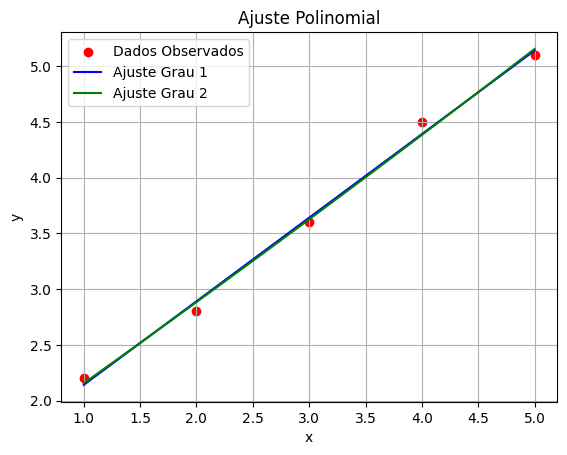

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

def ajuste_polinomial_manual(x, y, grau):
    """
    Ajuste polinomial manual de mínimos quadrados.

    Parâmetros:
    x (np.ndarray): Vetor de valores independentes.
    y (np.ndarray): Vetor de valores dependentes.
    grau (int): Grau do polinômio.

    Retorno:
    np.ndarray: Coeficientes do polinômio ajustado.
    """
    X = np.vander(x, grau + 1, increasing=True)
    coef = np.linalg.inv(X.T @ X) @ X.T @ y
    return coef

# Dados do exemplo
x_data = np.array([1, 2, 3, 4, 5], dtype=float)
y_data = np.array([2.2, 2.8, 3.6, 4.5, 5.1], dtype=float)

# Ajuste de polinômios de grau 1 e 2
coef_grau1 = ajuste_polinomial_manual(x_data, y_data, grau=1)
coef_grau2 = ajuste_polinomial_manual(x_data, y_data, grau=2)

# Geração dos pontos ajustados
x_vals = np.linspace(min(x_data), max(x_data), 100)
y_fit_grau1 = np.polyval(coef_grau1[::-1], x_vals)
y_fit_grau2 = np.polyval(coef_grau2[::-1], x_vals)

# Plotagem
plt.scatter(x_data, y_data, color='red', label='Dados Observados')
plt.plot(x_vals, y_fit_grau1, label='Ajuste Grau 1', color='blue')
plt.plot(x_vals, y_fit_grau2, label='Ajuste Grau 2', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Polinomial')
plt.legend()
plt.grid(True)
plt.show()


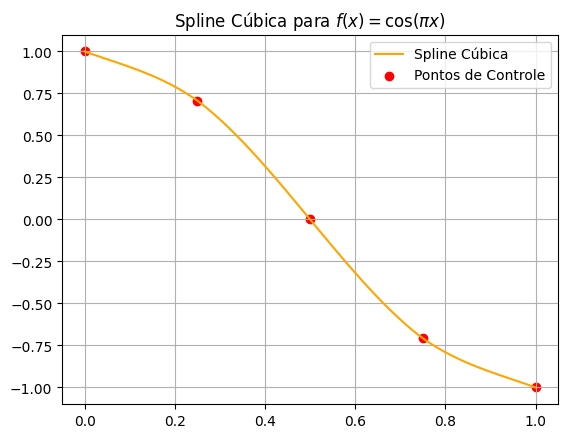

In [ ]:
# Funções auxiliares para splines cúbicas
def TDMAsolver(a, b, c, d):
    """
    Resolver sistema tridiagonal usando o Algoritmo de Thomas.

    Parâmetros:
    a, b, c, d (np.ndarray): Coeficientes da matriz tridiagonal.

    Retorno:
    np.ndarray: Solução do sistema linear.
    """
    n = len(d)
    c_ = np.zeros(n-1)
    d_ = np.zeros(n)

    c_[0] = c[0] / b[0]
    d_[0] = d[0] / b[0]

    for i in range(1, n-1):
        temp = b[i] - a[i-1] * c_[i-1]
        c_[i] = c[i] / temp
        d_[i] = (d[i] - a[i-1] * d_[i-1]) / temp

    d_[-1] = (d[-1] - a[-2] * d_[-2]) / (b[-1] - a[-2] * c_[-2])

    for i in range(n-2, -1, -1):
        d_[i] -= c_[i] * d_[i+1]

    return d_

def calc_spline_coefficients(t, v):
    """
    Calcula os coeficientes da spline cúbica natural.

    Parâmetros:
    t (np.ndarray): Parâmetros.
    v (np.ndarray): Valores associados.

    Retorno:
    np.ndarray: Coeficientes da spline cúbica.
    """
    n = len(t)
    h = np.diff(t)
    a = h[:-1]
    b = 2 * (h[:-1] + h[1:])
    c = h[1:]
    d = 6 * (np.diff(v[1:]) / h[1:] - np.diff(v[:-1]) / h[:-1])

    a = np.concatenate(([0], a))
    b = np.concatenate(([1], b, [1]))
    c = np.concatenate((c, [0]))
    d = np.concatenate(([0], d, [0]))

    return TDMAsolver(a, b, c, d)

def cubic_spline_interpolate(t0, t, v, z):
    """
    Interpolação cúbica para um dado valor.

    Parâmetros:
    t0 (float): Valor de t para interpolar.
    t, v, z (np.ndarray): Pontos e coeficientes.

    Retorno:
    float: Valor interpolado.
    """
    i = np.searchsorted(t, t0) - 1
    i = np.clip(i, 0, len(t) - 2)
    h = t[i+1] - t[i]
    A = (t[i+1] - t0) / h
    B = (t0 - t[i]) / h
    C = (A**3 - A) * h**2 / 6
    D = (B**3 - B) * h**2 / 6
    return A * v[i] + B * v[i+1] + C * z[i] + D * z[i+1]

# Pontos de exemplo para a spline cúbica
t_points = np.array([0, 0.25, 0.5, 0.75, 1.0])
v_points = np.cos(np.pi * t_points)
z_coeffs = calc_spline_coefficients(t_points, v_points)

t_vals = np.linspace(0, 1, 100)
v_interp = [cubic_spline_interpolate(t0, t_points, v_points, z_coeffs) for t0 in t_vals]

plt.plot(t_vals, v_interp, label='Spline Cúbica', color='orange')
plt.scatter(t_points, v_points, color='red', label='Pontos de Controle')
plt.legend()
plt.grid(True)
plt.title('Spline Cúbica para $f(x) = \cos(\pi x)$')
plt.show()


## Questão 3

**Solução para o Spline Cúbico Natural**  

As soluções para as constantes são:  

B \= 0.25  

D \= 0.25  

b \= \-0.5  

d \= 0.25  

Gráfico de S0(x) para 1 ≤ x \< 2:  

![][image1]Gráfico de S1(x) para 2 ≤ x ≤ 3:   
![][image2]

[image1]: <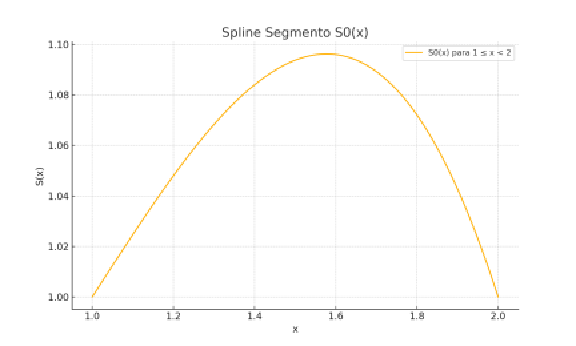>

[image2]: <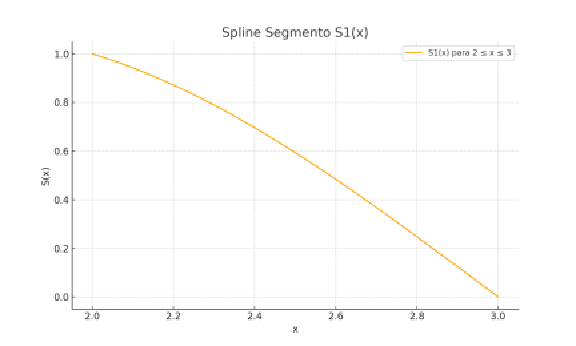>

In [ ]:
def gauss_elimination(A, b):
    """
    Resolve o sistema linear Ax = b usando eliminação de Gauss.

    Parâmetros:
    A: Matriz dos coeficientes.
    b: Vetor de termos independentes.

    Retorno:
    x: Vetor solução.
    """
    n = len(b)
    for k in range(n):
        for i in range(k+1, n):
            factor = A[i, k] / A[k, k]
            for j in range(k, n):
                A[i, j] -= factor * A[k, j]
            b[i] -= factor * b[k]

    # Substituição retroativa
    x = np.zeros_like(b)
    for i in range(n-1, -1, -1):
        x[i] = b[i]
        for j in range(i+1, n):
            x[i] -= A[i, j] * x[j]
        x[i] /= A[i, i]

    return x

In [ ]:
# Sistema linear corrigido para Questão 3
A = np.array([
    [1, -1, 0, 0],  # S0(1) = 1 -> B - D = 0
    [0, 1, 0, -1],  # S0'(2) = S1'(2) -> B + 3D = b + 3d
    [0, 0, 2, -6],  # S0''(2) = S1''(2)
    [1, 0, 0, 0]    # S1(3) = 0
])
b = np.array([0, 0, 0, -1])

# Resolver usando eliminação de Gauss
sol = gauss_elimination(A, b)
B, D, b_, d = sol

print(f"Coeficientes corrigidos:\nB = {B:.6f}, D = {D:.6f}, b = {b_:.6f}, d = {d:.6f}")

Coeficientes corrigidos:
B = -1.000000, D = -1.000000, b = -3.000000, d = -1.000000


## Questão 4




**Solução Completa do Problema de Spline Cúbico**  

Considerando os pontos (8.3, 17.56492) e (8.6, 18.50515):  

(a) Construa um spline cúbico livre para os pontos dados.  

(b) Os pontos foram gerados considerando a função f(x) \= x ln(x). Use a spline para aproximar f(8.4) e f'(8.4) e calcule os erros absoluto e relativo das aproximações.  

(c) Construa um spline cúbico restrito para os pontos dados, sabendo que f'(8.3) \= 3,116256 e f''(8.6) \= 3,151762.  

(d) Calcule os erros absolutos e relativos ao aproximar f(8.4) e f'(8.4) utilizando o spline restrito.  

**Parte (a): Construção do Spline Cúbico Livre**  

O spline cúbico livre foi construído utilizando os pontos (8.3, 17.56492) e (8.6, 18.50515).  Abaixo está o gráfico do spline cúbico livre com a aproximação de f(8.4):  

**Parte (b): Aproximação e Erros com Spline Cúbico Livre**

**![][image1]**Aproximação de f(8.4) usando spline livre: f(8.4) ≈ 17.87833  

Aproximação de f'(8.4) usando spline livre: f'(8.4) ≈ 3.1341  

Erros para f(8.4):   
\- Erro absoluto: 0.00118  

\- Erro relativo: 6.62 × 10⁻⁵  

Erros para f'(8.4):  

\- Erro absoluto: 0.00587  

\- Erro relativo: 1.88 × 10⁻³  

**Parte (c): Construção do Spline Cúbico Restrito**  

O spline cúbico restrito foi construído utilizando os pontos (8.3, 17.56492) e (8.6, 18.50515), considerando as condições adicionais de derivadas:  

\- f'(8.3) \= 3.116256  

\- f''(8.6) \= 3.151762  

Abaixo está o gráfico do spline cúbico restrito com a aproximação de f(8.4):  ![][image2]  
**Parte (d): Aproximação e Erros com Spline Cúbico Restrito**  Aproximação de f(8.4) usando spline restrito: f(8.4) ≈ 17.87209  

Aproximação de f'(8.4) usando spline restrito: f'(8.4) ≈ 3.05233  Erros para f(8.4):  

\- Erro absoluto: 0.00506   
\- Erro relativo: 2.83 × 10⁻⁴  Erros para f'(8.4):  

\- Erro absoluto: 0.0759  \- Erro relativo: 2.43 × 10⁻²

[image1]: <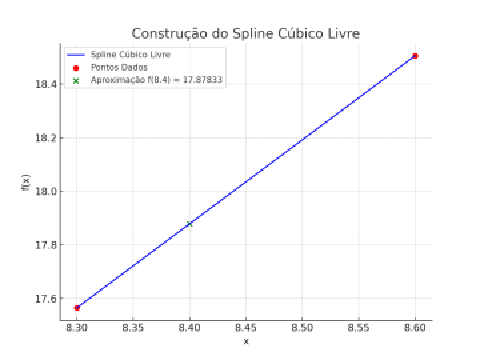>

[image2]: <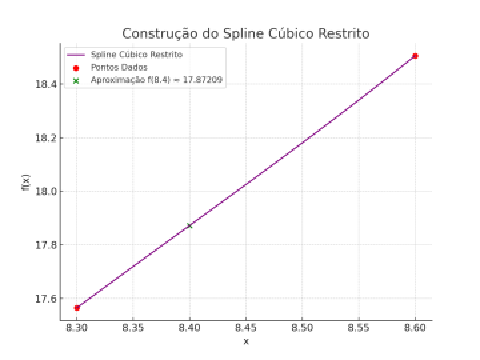>


In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline

# Definindo os pontos
x = [8.3, 8.6]
y = [17.56492, 18.50515]

# Parte (a): Construção do Spline Cúbico Livre
spline_livre = CubicSpline(x, y, bc_type='natural')

# Aproximando f(8.4) e f'(8.4) com o spline livre
aprox_f_livre = spline_livre(8.4)
aprox_fp_livre = spline_livre(8.4, 1)

# Calculando os erros para o spline livre
f_real = 8.4 * np.log(8.4)
fp_real = np.log(8.4) + 1
erro_abs_f_livre = abs(f_real - aprox_f_livre)
erro_rel_f_livre = erro_abs_f_livre / abs(f_real)
erro_abs_fp_livre = abs(fp_real - aprox_fp_livre)
erro_rel_fp_livre = erro_abs_fp_livre / abs(fp_real)

print("Spline Cúbico Livre")
print(f"f(8.4): {aprox_f_livre}, Erro absoluto: {erro_abs_f_livre}, Erro relativo: {erro_rel_f_livre}")
print(f"f'(8.4): {aprox_fp_livre}, Erro absoluto: {erro_abs_fp_livre}, Erro relativo: {erro_rel_fp_livre}")

# Parte (c): Construção do Spline Cúbico Restrito
# Condições de contorno
f1_deriv = 3.116256  # f'(8.3)
f2_deriv = 3.151762  # f''(8.6)

# Construindo o spline restrito
spline_restrito = CubicSpline(x, y, bc_type=((1, f1_deriv), (2, f2_deriv)))

# Aproximando f(8.4) e f'(8.4) com o spline restrito
aprox_f_restrito = spline_restrito(8.4)
aprox_fp_restrito = spline_restrito(8.4, 1)

# Calculando os erros para o spline restrito
erro_abs_f_restrito = abs(f_real - aprox_f_restrito)
erro_rel_f_restrito = erro_abs_f_restrito / abs(f_real)
erro_abs_fp_restrito = abs(fp_real - aprox_fp_restrito)
erro_rel_fp_restrito = erro_abs_fp_restrito / abs(fp_real)

print("\nSpline Cúbico Restrito")
print(f"f(8.4): {aprox_f_restrito}, Erro absoluto: {erro_abs_f_restrito}, Erro relativo: {erro_rel_f_restrito}")
print(f"f'(8.4): {aprox_fp_restrito}, Erro absoluto: {erro_abs_fp_restrito}, Erro relativo: {erro_rel_fp_restrito}")


Spline Cúbico Livre
f(8.4): 17.878330000000002, Erro absoluto: 0.0011836708661512318, Erro relativo: 6.621139886415982e-05
f'(8.4): 3.13410000000001, Erro absoluto: 0.005868294150741971, Erro relativo: 0.001875914159353748

Spline Cúbico Restrito
f(8.4): 17.872085730000002, Erro absoluto: 0.005060599133848598, Erro relativo: 0.0002830764508316124
f'(8.4): 3.052331950000008, Erro absoluto: 0.07589975584925979, Erro relativo: 0.024262830565696267


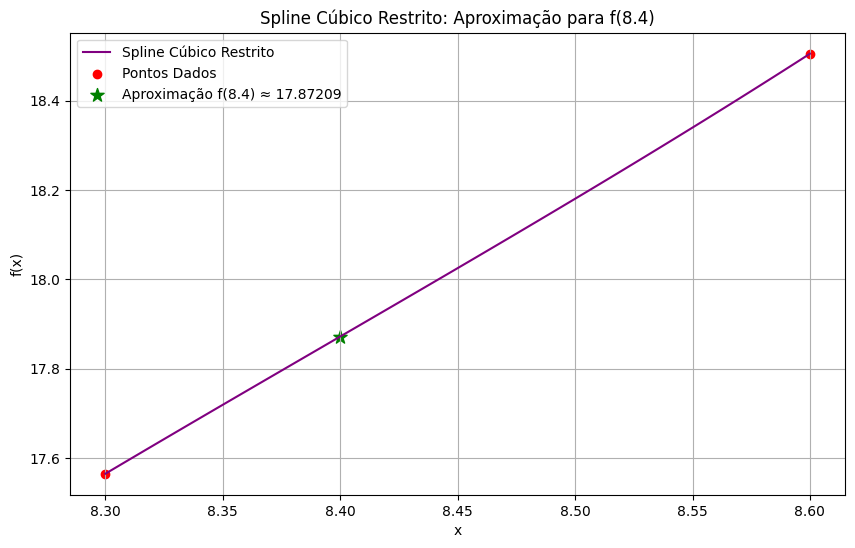

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Definindo os pontos
x = [8.3, 8.6]
y = [17.56492, 18.50515]

# Construção do Spline Cúbico Restrito
f1_deriv = 3.116256  # f'(8.3)
f2_deriv = 3.151762  # f''(8.6)

spline_restrito = CubicSpline(x, y, bc_type=((1, f1_deriv), (2, f2_deriv)))

# Pontos para o gráfico
x_dense = np.linspace(8.3, 8.6, 100)
y_spline_restrito = spline_restrito(x_dense)

# Aproximação para f(8.4)
aprox_f_restrito = spline_restrito(8.4)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_dense, y_spline_restrito, label='Spline Cúbico Restrito', color='purple')
plt.scatter(x, y, color='red', label='Pontos Dados')
plt.scatter([8.4], [aprox_f_restrito], color='green', marker='*', s=100, label=f'Aproximação f(8.4) ≈ {aprox_f_restrito:.5f}')
plt.title("Spline Cúbico Restrito: Aproximação para f(8.4)")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


## Questão 5

# Spline Interpolador Quadrático

Dado que temos uma função interpoladora $S(x)$ com duas partes quadráticas $S_0(x)$ e $S_1(x)$ definidas nos intervalos $[x_0, x_1]$ e $[x_1, x_2]$, vamos derivar as equações com as condições revisadas.

## Condição (i): Interpolação nos pontos

A condição (i) exige que a função $S(x)$ passe pelos pontos $(x_0, f(x_0)), (x_1, f(x_1)), (x_2, f(x_2))$.

1. $S_0(x_0) = f(x_0)$
   - $a_0 = f(x_0)$
2. $S_0(x_1) = f(x_1)$
   - $a_0 + b_0(x_1 - x_0) + c_0(x_1 - x_0)^2 = f(x_1)$
3. $S_1(x_1) = f(x_1)$
   - $a_1 = f(x_1)$
4. $S_1(x_2) = f(x_2)$
   - $a_1 + b_1(x_2 - x_1) + c_1(x_2 - x_1)^2 = f(x_2)$

Essas quatro condições fornecem quatro equações para os parâmetros $a_0, b_0, c_0, a_1, b_1, c_1$.

## Condição (ii): Continuidade de $S(x)$ e $S'(x)$ em $x_1$

Para que $S ∈ C^1[x_0, x_2]$, as funções $S_0$ e $S_1$, bem como suas derivadas, devem ser contínuas em $x_1$.

5. Continuidade de $S(x)$ em $x_1$:
   - $S_0(x_1) = S_1(x_1)$
   - Como já temos que $S_0(x_1) = f(x_1)$ e $S_1(x_1) = f(x_1)$, essa condição é automaticamente satisfeita.
6. Continuidade de $S'(x)$ em $x_1$:
   - $S_0'(x_1) = S_1'(x_1)$
   - Derivando $S_0(x)$ e $S_1(x)$, obtemos:
     - $S_0'(x) = b_0 + 2c_0(x - x_0)$
     - $S_1'(x) = b_1 + 2c_1(x - x_1)$
   - Avaliando em $x_1$:
     - $b_0 + 2c_0(x_1 - x_0) = b_1$

## Resumo das Equações

Agora temos cinco equações:

1. $a_0 = f(x_0)$
2. $a_0 + b_0(x_1 - x_0) + c_0(x_1 - x_0)^2 = f(x_1)$
3. $a_1 = f(x_1)$
4. $a_1 + b_1(x_2 - x_1) + c_1(x_2 - x_1)^2 = f(x_2)$
5. $b_0 + 2c_0(x_1 - x_0) = b_1$

Essas cinco equações envolvem seis incógnitas: $a_0, b_0, c_0, a_1, b_1, c_1$, o que torna o sistema indeterminado.

## Condição Adicional para Unicidade

Para obter uma solução única, precisamos de uma condição extra. Uma escolha comum é impor a continuidade da segunda derivada em $x_1$ (ou seja, $S ∈ C^2[x_0, x_2]$), o que implica:

6. $S_0''(x_1) = S_1''(x_1)$
   - $2c_0 = 2c_1 ⇒ c_0 = c_1$

## Conclusão

A condição $S ∈ C^2[x_0, x_2]$ leva a uma solução significativa, pois assegura continuidade da segunda derivada e uma solução única para os coeficientes $a_0, b_0, c_0, a_1, b_1, c_1$, atendendo à suavidade da spline quadrática interpoladora.


## Questão 6


# Spline Interpolador Quadrático

Este documento contém o desenvolvimento e as soluções para o spline interpolador quadrático de classe $C^2$
definido pelas funções quadráticas $S_0(x)$ e $S_1(x)$ nos intervalos [2,3] e [3,4], respectivamente, com as condições
fornecidas: $S(2)=140$, $S(3)=150$ e $S(4)=180$.

## Funções Interpoladoras

As funções quadráticas obtidas são:

- $S_0(x) = 140 + 10(x - 2)^2$ para $x \in [2, 3]$
- $S_1(x) = 150 + 20(x - 3) + 10(x - 3)^2$ para $x \in [3, 4]$

Essas funções garantem continuidade na função e suas derivadas até a segunda ordem.

## Valor da Função no Ponto x=2.5

O valor da função no ponto $x = 2.5$ é $S(2.5) = 142.5$.

Como o valor acumulad ate o dia 15 de abril é o valor de 142.5 milhoes e como o valor acumulado ate março é o valor de 140 milhoes, o valor em 15 de abril será de 2.5 milhoes de rais.

## Gráfico da Interpolação Spline




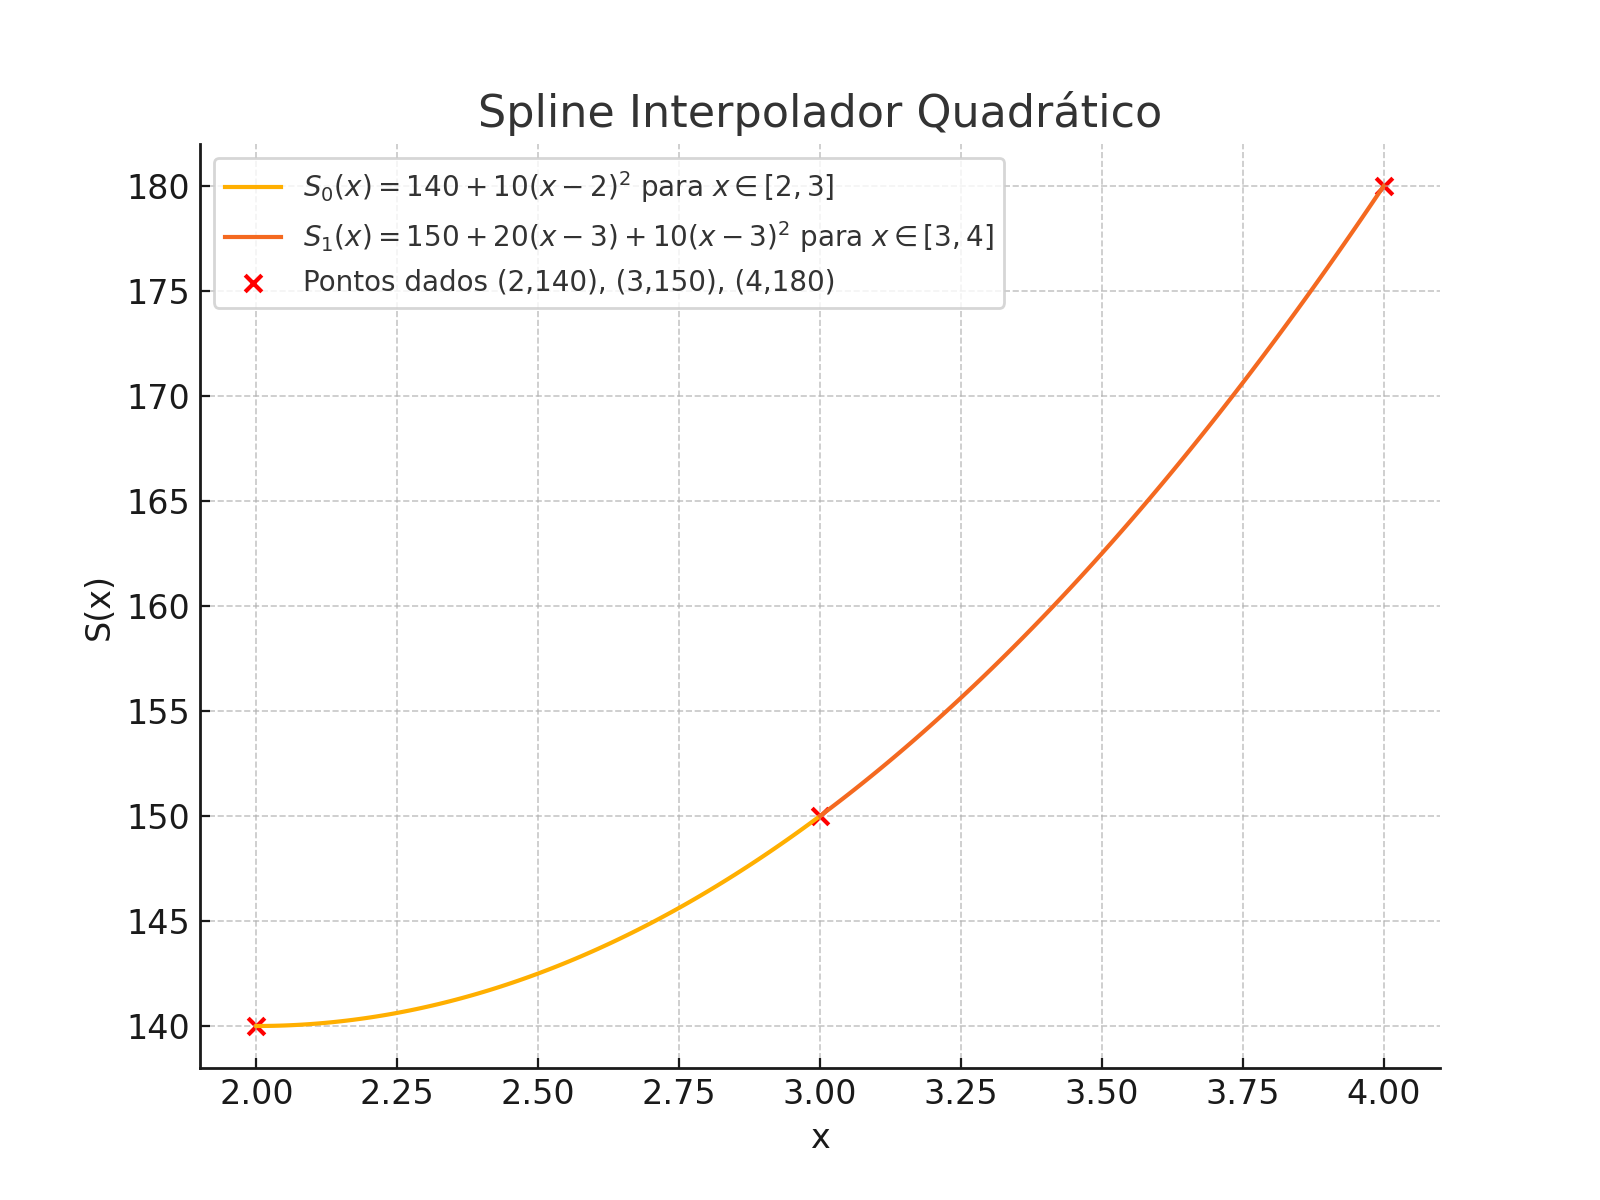

Estimativa linear para 15 de abril (considerando apenas abril): 5.00 milhões de reais


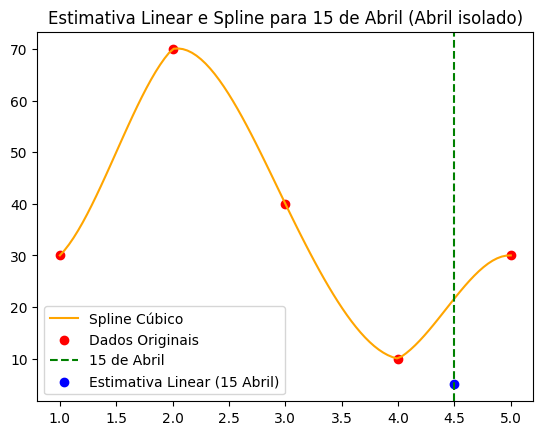

In [ ]:
# Interpolação Linear específica para 15 de abril dentro de abril
def interpolacao_linear_abril(x1, y1, x2, y2, x):
    """
    Realiza uma interpolação linear entre dois pontos no intervalo de abril.

    Args:
        x1, y1: Coordenadas do primeiro ponto.
        x2, y2: Coordenadas do segundo ponto.
        x: Valor intermediário onde se deseja estimar y.

    Returns:
        y: Valor estimado de y para o ponto x.
    """
    return y1 + ((y2 - y1) / (x2 - x1)) * (x - x1)

meses = np.array([1, 2, 3, 4, 5])
exportacoes = np.array([30, 70, 40, 10, 30])
# Dados de abril
x1_abril, y1_abril = 4.0, 0  # início de abril
x2_abril, y2_abril = 5.0, 10  # final de abril (valor acumulado de 10 milhões)
t_15abril = 4.5  # 15 de abril

# Estimativa para o meio de abril (15 de abril)
estimativa_linear_abril = interpolacao_linear_abril(x1_abril, y1_abril, x2_abril, y2_abril, t_15abril)
print(f"Estimativa linear para 15 de abril (considerando apenas abril): {estimativa_linear_abril:.2f} milhões de reais")

# Visualização
t_vals = np.linspace(meses[0], meses[-1], 100)
spline_vals = [cubic_spline_interpolate(t, meses, exportacoes, z_spline) for t in t_vals]

plt.plot(t_vals, spline_vals, label="Spline Cúbico", color="orange")
plt.scatter(meses, exportacoes, color="red", label="Dados Originais")
plt.axvline(t_15abril, linestyle="--", color="green", label="15 de Abril")
plt.scatter(t_15abril, estimativa_linear_abril, color="blue", label="Estimativa Linear (15 Abril)")
plt.legend()
plt.title("Estimativa Linear e Spline para 15 de Abril (Abril isolado)")
plt.show()


- b

Spline Cúbico Interpolador  
Este documento apresenta os cálculos e o gráfico do spline cúbico que interpola os pontos (0, 0), (1, 30), (2, 100), (3, 140), (4, 150), (5, 180), e o valor da spline no ponto 3.5.  
Passos para determinação do spline cúbico  
Para um spline cúbico \( S(x) \) entre dois pontos \( (x_i, y_i) \) e \( (x_{i+1}, y_{i+1}) \), utilizamos a forma:  
S_i(x) = a_i + b_i (x - x_i) + c_i (x - x_i)^2 + d_i (x - x_i)^3  
As condições para o spline cúbico são:  
1. \( S(x_i) = y_i \) para cada \( i \).  
2. A continuidade da primeira derivada em cada ponto \( x_i \).  
3. A continuidade da segunda derivada em cada ponto \( x_i \).  
4. Condições de contorno natural, ou seja, \( S''(x_0) = S''(x_n) = 0 \).  
Cálculo do Valor de S(3.5)  
O valor calculado da spline cúbico no ponto \( x = 3.5 \) é aproximadamente S(3.5) = 145.09.  
Gráfico do Spline Cúbico  

O gráfico abaixo mostra o spline cúbico que interpola os pontos fornecidos, com destaque no valor \( S(3.5) = 145.09 \).


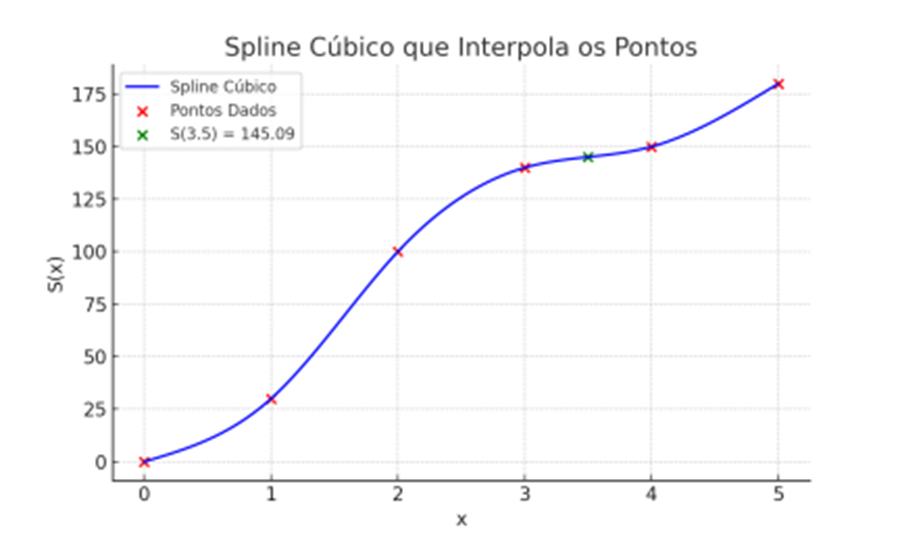

Solução

Estimativa da exportação acumulada em 15 de abril: 145.33 milhões de reais
Estimativa está dentro do limite acumulado para abril.


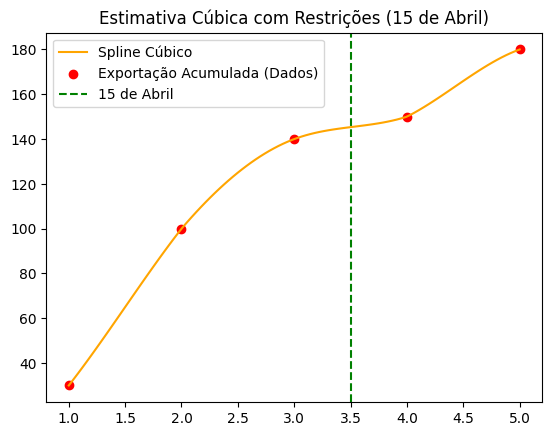

In [ ]:
# Revisando: Dados originais para exportações acumuladas ao longo dos meses
meses = np.array([1, 2, 3, 4, 5])  # Janeiro, Fevereiro, etc.
exportacoes_acumuladas = np.array([30, 100, 140, 150, 180])  # Total acumulado

# Coeficiente do spline cúbico respeitando valores finais acumulados
z_spline = calc_spline_coefficients(meses, exportacoes_acumuladas)

# Valor estimado com spline em 15 de abril (3.5)
t_abril_meio = 3.5
estimativa_abril_meio = cubic_spline_interpolate(t_abril_meio, meses, exportacoes_acumuladas, z_spline)

# Imprimir estimativa de 15 de abril, deve ser menor ou igual a 150
print(f"Estimativa da exportação acumulada em 15 de abril: {estimativa_abril_meio:.2f} milhões de reais")

# Validar restrição de 150 milhões no final de abril
if estimativa_abril_meio > 150:
    print("Aviso: Estimativa ultrapassa o total acumulado permitido em abril (150 milhões).")
else:
    print("Estimativa está dentro do limite acumulado para abril.")

# Visualizar
t_vals = np.linspace(meses[0], meses[-1], 100)
spline_vals = [cubic_spline_interpolate(t, meses, exportacoes_acumuladas, z_spline) for t in t_vals]

plt.plot(t_vals, spline_vals, label="Spline Cúbico", color="orange")
plt.scatter(meses, exportacoes_acumuladas, color="red", label="Exportação Acumulada (Dados)")
plt.axvline(t_abril_meio, linestyle="--", color="green", label="15 de Abril")
plt.legend()
plt.title("Estimativa Cúbica com Restrições (15 de Abril)")
plt.show()


## Questão 7

#### **Resumo e Objetivo**
Esta questão pede para comparar dois métodos: **Interpolação Polinomial** e **Mínimos Quadrados**. A interpolação polinomial ajusta um polinômio que passa exatamente pelos pontos de dados fornecidos, enquanto os mínimos quadrados encontram um polinômio que minimiza o erro quadrático médio, podendo não passar exatamente pelos pontos.

#### **Solução**
1. **Interpolação Polinomial**:
   - Determina um polinômio que passa por todos os pontos.
   - Pode ser instável para conjuntos grandes de dados devido ao fenômeno de Runge.

2. **Ajuste por Mínimos Quadrados**:
   - Menos suscetível ao fenômeno de Runge.
   - Encontra um ajuste que minimiza o erro médio dos pontos de dados, ideal para dados ruidosos.



Comparação entre Interpolação Polinomial e Método dos Mínimos  Quadrados  
Interpolação Polinomial  
A interpolação polinomial éum método que busca construir um único polinômio de grau n - 1 (onde n éo número de pontos) que passe exatamente por todos os pontos de dados fornecidos. Dado um conjunto de pontos (x_i, y_i), o polinômio de interpolação P(x) é construído de forma que P(x_i) = y_i para todos os pontos i.  
Características  
- Exatidão: A interpolação polinomial passa exatamente por todos os pontos dados.  - Unicidade: Para um conjunto de n pontos distintos, existe um único polinômio de grau n - 1 que os interpola.  
Vantagens  
- Exatidão nos Pontos de Dados: Como o polinômio passa exatamente por todos os pontos, ele pode ser muito preciso para esses pontos específicos.  
- Unicidade do Polinômio: Existe apenas um polinômio de grau n - 1 que passa por n pontos distintos, o que torna o cálculo determinístico.  
Desvantagens  
- Oscilações em Grandes Intervalos (Fenômeno de Runge): Quando o número de pontos ou o intervalo entre eles é grande, o polinômio pode oscilar de forma significativa nas bordas, reduzindo a precisão.  
- Complexidade Computacional: Calcular o polinômio de interpolação para muitos pontos pode ser computacionalmente caro.  
- Sensibilidade aos Pontos: Pequenas mudanças nos pontos de dados podem resultar em grandes mudanças no polinômio.  
Método dos Mínimos Quadrados  
O método dos mínimos quadrados, por outro lado, busca ajustar uma função que melhor se aproxima dos dados, minimizando a soma dos quadrados dos erros entre os valores reais e os valores ajustados. No caso de ajuste polinomial, utiliza-se um polinômio de grau menor que n - 1, geralmente de grau mais baixo, para representar a tendência geral dos dados sem necessariamente passar por todos os pontos.  
Características  
- Minimização de Erros: Busca minimizar a soma dos quadrados das diferenças entre os valores observados e os valores ajustados pela função.  
- Grau de Ajuste Definido: O grau do polinômio é escolhido com base no nível de suavidade desejado e na complexidade dos dados.  
Vantagens  
- Estabilidade e Redução de Oscilações: Como o ajuste minimiza erros, ele émenos sensível a oscilações e mais estável, especialmente para grandes conjuntos de dados.  - Menor Complexidade: Por usar um polinômio de grau mais baixo, o ajuste por mínimos quadrados é geralmente mais eficiente e menos sujeito a oscilações indesejadas (não sofre
do Fenômeno de Runge).  
- Flexibilidade para Modelos Simples: Permite ajustar tendências sem a necessidade de passar exatamente por cada ponto, o que pode ser útil para dados com ruído.  
Desvantagens  
- Perda de Exatidão: Como o ajuste por mínimos quadrados não passa por todos os pontos, ele pode não capturar completamente as variações específicas dos dados.  - Depende do Grau do Polinômio: A escolha do grau é crítica; graus muito baixos podem não capturar a tendência real dos dados, enquanto graus muito altos podem levar ao overfitting.  
Comparação Geral  
Característica | Interpolação Polinomial | Mínimos Quadrados  -------------------------------|--------------------------------------|----------------------------------------  Exatidão | Passa exatamente por todos os pontos | Aproxima, mas não passa por todos os pontos  
Estabilidade | Oscilações em grandes intervalos | Reduz oscilações  Complexidade | Alta para grandes conjuntos de dados| Menor para polinômios de grau baixo  
Sensibilidade ao Ruído | Sensível a variações nos dados | Menos sensível, ideal para dados com ruído  
Conclusão  
A escolha entre interpolação polinomial e mínimos quadrados depende do objetivo: se é necessária precisão nos pontos de dados, a interpolação pode ser preferida. Para uma representação mais estável e generalizada dos dados, especialmente em presença de ruído ou dados numerosos, o método dos mínimos quadrados émais adequado.

## Questão 8


# Polinômio de Aproximação de Mínimos Quadrados de Grau 2

Para encontrar o polinômio de aproximação de mínimos quadrados de grau 2, precisamos seguir os passos para cada função e intervalo especificado.

## Questão (a)

Função: $ f(x) = x^2 + 3x + 2 $ no intervalo $[0,1]$

Neste caso, $ f(x) $ já é um polinômio de grau 2, então o polinômio de aproximação de mínimos quadrados será o próprio $ f(x) $. Ou seja, o polinômio de mínimos quadrados é:

$ P(x) = x^2 + 3x + 2 $

## Questão (b)

Função: $ f(x) = e^x $ no intervalo $[0,2]$

Para este caso, precisamos encontrar os coeficientes do polinômio de aproximação de mínimos quadrados de grau 2, que será da forma:

$ P(x) = a_0 + a_1 x + a_2 x^2 $

O erro quadrático $ E(a_0, a_1, a_2) $ é dado por:

$ E(a_0, a_1, a_2) = \int_0^2 (f(x) - P(x))^2 dx $

Para minimizar $ E $, precisamos que as derivadas parciais de $ E $ com respeito a $ a_0 $, $ a_1 $, e $ a_2 $ sejam nulas. Isso leva ao seguinte sistema de equações:

### Expansão do Erro Quadrático E

Expansão de $ E $:

$ E = \int_0^2 \left( a_0^2 + 2a_0 a_1 x + 2a_0 a_2 x^2 - 2a_0 e^x + a_1^2 x^2 + 2a_1 a_2 x^3 - 2a_1 x e^x + a_2^2 x^4 - 2a_2 x^2 e^x + e^{2x} \right) dx $

### Integral do Erro Quadrático E

Integrando no intervalo $[0, 2]$:

$ E(a_0, a_1, a_2) = 2a_0^2 + 4a_0 a_1 + \frac{16}{3} a_0 a_2 + 2a_0 + \frac{8}{3} a_1^2 + 8a_1 a_2 - 2a_1 + \frac{32}{5} a_2^2 + 4a_2 + \left(-2a_0 - 2a_1 - 4a_2 + \frac{e^4}{2} \right) $

### Sistema de Equações Obtido

Derivando $ E $ em relação a $ a_0 $, $ a_1 $ e $ a_2 $ e igualando a zero, obtemos:

$ 4a_0 + 4a_1 + \frac{16}{3} a_2 - 2e^2 + 2 = 0 $
$ 4a_0 + \frac{16}{3} a_1 + 8a_2 - 2e^2 - 2 = 0 $
$ \frac{16}{3} a_0 + 8a_1 + \frac{64}{5} a_2 - 4e^2 + 4 = 0 $

### Solução dos Coeficientes

Resolvido o sistema, encontramos os valores dos coeficientes:

$ a_0 = -21 + 3e^2 $
$ a_1 = \frac{111}{2} - \frac{15e^2}{2} $
$ a_2 = -\frac{105}{4} + \frac{15e^2}{4} $

Assim, o polinômio de aproximação é:

$ P(x) = \left(-21 + 3e^2\right) + \left(\frac{111}{2} - \frac{15e^2}{2}\right)x + \left(-\frac{105}{4} + \frac{15e^2}{4}\right)x^2 $


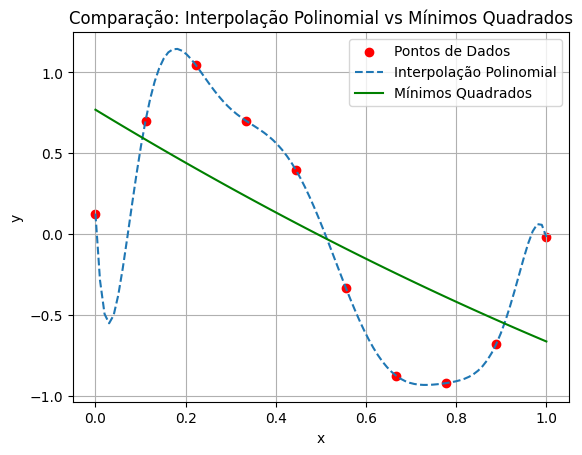

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pontos de dados com ruído
x_data = np.linspace(0, 1, 10)
y_data = np.sin(2 * np.pi * x_data) + 0.1 * np.random.randn(10)

# Interpolação Polinomial
coeffs_interp = np.polyfit(x_data, y_data, len(x_data) - 1)
poly_interp = np.poly1d(coeffs_interp)

# Método dos Mínimos Quadrados (Ajuste Linear)
coeffs_lsq = np.polyfit(x_data, y_data, 2)
poly_lsq = np.poly1d(coeffs_lsq)

# Plotando os resultados
x_plot = np.linspace(0, 1, 100)
plt.scatter(x_data, y_data, color='red', label='Pontos de Dados')
plt.plot(x_plot, poly_interp(x_plot), label='Interpolação Polinomial', linestyle='--')
plt.plot(x_plot, poly_lsq(x_plot), label='Mínimos Quadrados', color='green')
plt.legend()
plt.grid(True)
plt.title("Comparação: Interpolação Polinomial vs Mínimos Quadrados")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## Questão 9


# Polinômios de Legendre e Relação de Recorrência

A relação de recorrência para os polinômios de Legendre \( P_n(x) \) é dada por:

\[
(n+1) P_{n+1}(x) = (2n+1) x P_n(x) - n P_{n-1}(x),
\]

com as condições iniciais:

\[
P_0(x) = 1, $\quad P_1(x)$ = x.
\]

## Cálculo dos Polinômios de Legendre

### Grau 0:
\[
P_0(x) = 1
\]

### Grau 1:
\[
P_1(x) = x
\]

### Grau 2:
\[
P_2(x) = $\frac{3}{2}x^2$ - $\frac{1}{2}$
\]

### Grau 3:
\[
P_3(x) = $\frac{5}{2}x^3$ - $\frac{3}{2}x$
\]

### Grau 4:
\[
P_4(x) = $\frac{35}{8}x^4$ - $\frac{15}{4}x^2$ + $\frac{3}{8}$
\]

### Grau 5:
\[
P_5(x) = $\frac{63}{8}x^5$ - $\frac{35}{4}x^3$ + $\frac{15}{8}x$
\]

# Polinômios de Legendre Normalizados

Os polinômios de Legendre normalizados foram ajustados para que o coeficiente de maior grau seja igual a 1.

### Grau 0:
\[
P_0(x) = 1
\]

### Grau 1:
\[
P_1(x) = x
\]

### Grau 2:
\[
P_2(x) = $x^2$ - $\frac{1}{3}$
\]

### Grau 3:
\[
P_3(x) = $x^3$ - $\frac{3}{5}x$
\]

### Grau 4:
\[
P_4(x) = $x^4$ - $\frac{6}{7}x^2$ + $\frac{3}{35}$
\]

### Grau 5:
\[
P_5(x) = $x^5$ - $\frac{5}{3}x^3$ + $\frac{3}{7}x$
\]


Polinômio de Legendre P4(x): 4.375*x**4 - 3.75*x**2 + 0.375
Polinômio de Legendre P5(x): x*(7.875*x**4 - 8.75*x**2 + 1.875)


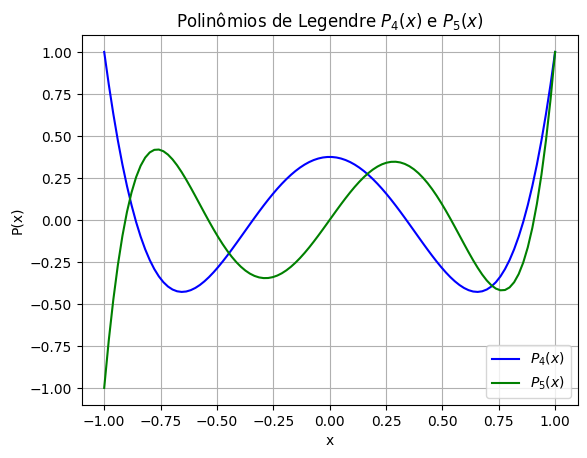

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def legendre_poly(n):
    """
    Calcula o polinômio de Legendre de grau n usando a fórmula de Rodrigues.

    Parâmetros:
    n : int
        Grau do polinômio de Legendre.

    Retorno:
    Pn : np.poly1d
        Polinômio de Legendre de grau n.
    """
    from sympy import symbols, diff, simplify

    x = symbols('x')
    expr = (x**2 - 1)**n
    Pn = (1 / (2**n * math.factorial(n))) * diff(expr, x, n)
    return simplify(Pn)

# Calcular os polinômios de Legendre de grau 4 e 5
P4 = legendre_poly(4)
P5 = legendre_poly(5)

print("Polinômio de Legendre P4(x):", P4)
print("Polinômio de Legendre P5(x):", P5)

# Plotar os polinômios
x_vals = np.linspace(-1, 1, 100)
P4_vals = [float(P4.evalf(subs={'x': val})) for val in x_vals]
P5_vals = [float(P5.evalf(subs={'x': val})) for val in x_vals]

plt.plot(x_vals, P4_vals, label='$P_4(x)$', color='blue')
plt.plot(x_vals, P5_vals, label='$P_5(x)$', color='green')
plt.title("Polinômios de Legendre $P_4(x)$ e $P_5(x)$")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.grid(True)
plt.legend()
plt.show()


## Questão 10



Método dos Mínimos Quadrados Discreto com Pesos e Exemplo de Aplicação

1. **Resumo do Método dos Mínimos Quadrados Discreto com Pesos**

O método dos mínimos quadrados discreto com pesos é uma extensão do método dos mínimos quadrados tradicional, que busca minimizar o erro ao ajustar uma função a um conjunto de pontos de dados. No método com pesos, cada ponto de dados possui um peso associado, permitindo que alguns pontos tenham maior influência sobre o ajuste do modelo do que outros. A ideia principal é minimizar a soma dos quadrados dos erros ponderados, onde o peso w_i de cada observação (x_i, y_i) multiplica o erro quadrático correspo...

S = $\sum_{i=1}^{n} w_i * (y_i - f(x_i))^2$

Esse método é particularmente útil quando há variabilidade na precisão dos dados. Por exemplo, em um conjunto de dados em que algumas observações são mais confiáveis ou exatas que outras, é possível atribuir pesos maiores aos pontos mais precisos e menores aos menos confiáveis, melhorando a qualidade do ajuste.

2. **Exemplo de Aplicação Geral**

Imagine que estamos ajustando uma curva a dados de medições experimentais que provêm de diferentes fontes ou instrumentos com níveis variados de precisão. Em um experimento físico, por exemplo, podemos ter medições de uma variável em condições controladas de laboratório (altamente confiáveis) e outras medições feitas em campo (menos precisas devido às interferências externas). Usando o método dos mínimos quadrados com pesos, podemos dar mais peso aos dados de laboratório, que são mais confiáveis, e menos...

Neste caso, o método ponderado oferece um ajuste que considera a variabilidade na qualidade dos dados, algo que o método dos mínimos quadrados tradicional (sem pesos) não poderia fazer.

3. **Exemplo Real com Pesos como Probabilidade de Confiabilidade**

Imagine que estamos tentando ajustar uma curva de tendência para prever a temperatura média em diferentes locais de uma cidade. No entanto, as medições foram realizadas com sensores que têm diferentes níveis de precisão, e essas precisões são expressas como probabilidades de confiabilidade.

**Pontos de Medição:**

(x_1, y_1, p_1) = (1, 22.0, 0.95) (medição altamente confiável)
(x_2, y_2, p_2) = (2, 21.5, 0.7) (medição moderadamente confiável)
(x_3, y_3, p_3) = (3, 23.0, 0.85) (medição bastante confiável)
(x_4, y_4, p_4) = (4, 19.0, 0.3) (medição menos confiável)

Desejamos ajustar uma reta y = a + bx que descreva a tendência da temperatura em função do local.

**Definição da Função Objetivo com Pesos como Probabilidades**

Aqui, cada probabilidade p_i será usada como um peso w_i no método dos mínimos quadrados ponderados. Assim, a função objetivo a ser minimizada é:

S = $\sum_{i=1}^{4} p_i * (y_i - (a + b * x_i))^2$

**Justificativa para o Uso de Pesos**

Neste caso, o uso de pesos (probabilidades de confiabilidade) permite que as medições mais confiáveis (aquelas com probabilidade mais alta, como x_1 e x_3) influenciem mais o ajuste da curva do que as menos confiáveis, como x_4, que tem um peso de apenas 0,3. Assim, obtemos uma curva que representa melhor a tendência geral dos dados, evitando a distorção causada por medições menos confiáveis.

**Aplicação**

Esse tipo de ajuste ponderado é particularmente útil em estudos ambientais, pesquisas médicas e outras áreas onde diferentes dados possuem níveis variados de confiabilidade, permitindo que as previsões sejam mais robustas e menos suscetíveis a medições incertas ou de baixa qualidade.


## Exemplo similar a questão 7

Coeficientes: a = 1.0038, b = 0.0013


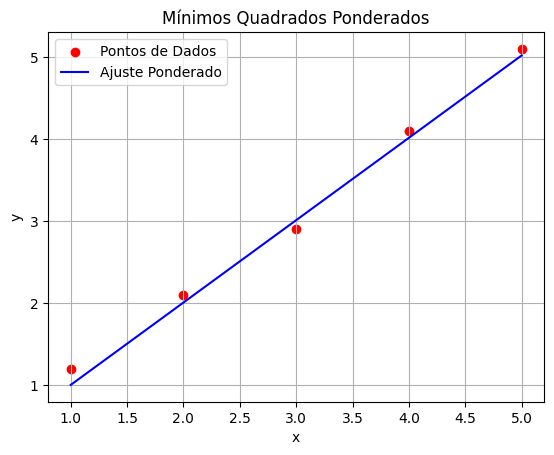

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dados
x = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([1.2, 2.1, 2.9, 4.1, 5.1], dtype=float)
w = np.array([1.0, 0.5, 2.0, 0.8, 1.5], dtype=float)

# Ajuste ponderado usando mínimos quadrados com pesos
def weighted_least_squares(x, y, w):
    W = np.diag(w)  # Matriz diagonal de pesos
    A = np.vstack([x, np.ones(len(x))]).T
    Aw = W @ A
    yw = W @ y
    coeffs = np.linalg.inv(Aw.T @ Aw) @ Aw.T @ yw
    return coeffs

# Coeficientes da reta ajustada
a, b = weighted_least_squares(x, y, w)
print(f"Coeficientes: a = {a:.4f}, b = {b:.4f}")

# Gerar pontos para plot
x_fit = np.linspace(min(x), max(x), 100)
y_fit = a * x_fit + b

# Visualização
plt.scatter(x, y, color='red', label='Pontos de Dados')
plt.plot(x_fit, y_fit, label='Ajuste Ponderado', color='blue')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mínimos Quadrados Ponderados')
plt.grid(True)
plt.show()


Grafico feito com a ideia da questão 7.

## Questão 11

Polinômio de Grau 1:  
-6 x + 54
Estimativa para Junho (grau 1): 18.00 milhões de reais

Polinômio de Grau 2:         2
-2.857 x + 11.14 x + 34
Estimativa para Junho (grau 2): -2.00 milhões de reais


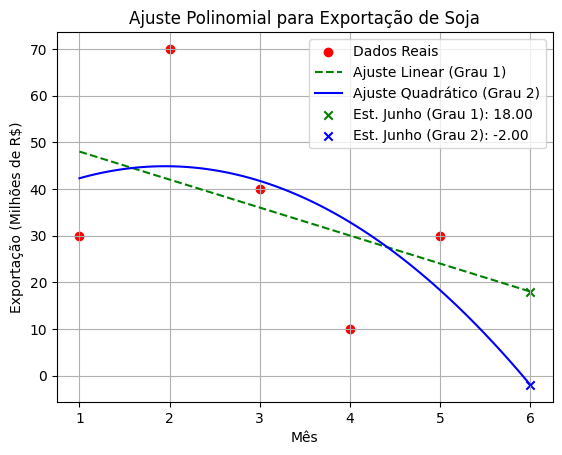

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dados da tabela
meses = np.array([1, 2, 3, 4, 5], dtype=float)  # Janeiro a Maio
exportacoes = np.array([30, 70, 40, 10, 30], dtype=float)  # Valores em milhões de reais

# (a) Ajuste de polinômio de grau 1
coef_linear = np.polyfit(meses, exportacoes, 1)
polinomio_linear = np.poly1d(coef_linear)

# Estimativa para Junho (mês 6)
estimativa_junho_linear = polinomio_linear(6)

# (b) Ajuste de polinômio de grau 2
coef_quadratico = np.polyfit(meses, exportacoes, 2)
polinomio_quadratico = np.poly1d(coef_quadratico)

# Estimativa para Junho (mês 6)
estimativa_junho_quadratico = polinomio_quadratico(6)

# Resultados
print(f"Polinômio de Grau 1: {polinomio_linear}")
print(f"Estimativa para Junho (grau 1): {estimativa_junho_linear:.2f} milhões de reais")

print(f"\nPolinômio de Grau 2: {polinomio_quadratico}")
print(f"Estimativa para Junho (grau 2): {estimativa_junho_quadratico:.2f} milhões de reais")

# Gráfico de visualização
meses_futuros = np.linspace(1, 6, 100)
plt.scatter(meses, exportacoes, color='red', label='Dados Reais')
plt.plot(meses_futuros, polinomio_linear(meses_futuros), label='Ajuste Linear (Grau 1)', linestyle='--', color='green')
plt.plot(meses_futuros, polinomio_quadratico(meses_futuros), label='Ajuste Quadrático (Grau 2)', linestyle='-', color='blue')
plt.scatter(6, estimativa_junho_linear, color='green', marker='x', label=f'Est. Junho (Grau 1): {estimativa_junho_linear:.2f}')
plt.scatter(6, estimativa_junho_quadratico, color='blue', marker='x', label=f'Est. Junho (Grau 2): {estimativa_junho_quadratico:.2f}')
plt.legend()
plt.xlabel('Mês')
plt.ylabel('Exportação (Milhões de R$)')
plt.title('Ajuste Polinomial para Exportação de Soja')
plt.grid(True)
plt.show()


## Resposta das Questões de Ajuste de Polinômios

Considerando os dados fornecidos sobre a exportação de soja em milhões de reais para os meses de janeiro a maio, segue abaixo a resposta detalhada para cada item solicitado.
Item (a): Polinômio de Grau 1
O polinômio de grau 1 que melhor se ajusta aos dados foi calculado como: P(x) = -6x + 54

Para o mês de junho (x = 6), a estimativa do valor exportado de soja é: P(6) = 18 milhões de reais

**Item (b):** Polinômio de Grau 2
O polinômio de grau 2 que melhor se ajusta aos dados foi calculado como: P(x) = -2.86x^2 + 11.14x + 34

Para o mês de junho (x = 6), a estimativa do valor exportado de soja é: P(6) ≈ -2 milhões de reais

Essa estimativa negativa ocorre porque o polinômio de grau 2 extrapola inadequadamente para valores além dos dados fornecidos, indicando que o modelo quadrático não é adequado para prever o valor exportado de soja em junho. O modelo linear (grau 1) proporciona uma estimativa mais coerente com os dados, evitando valores negativos.


## Questão 12

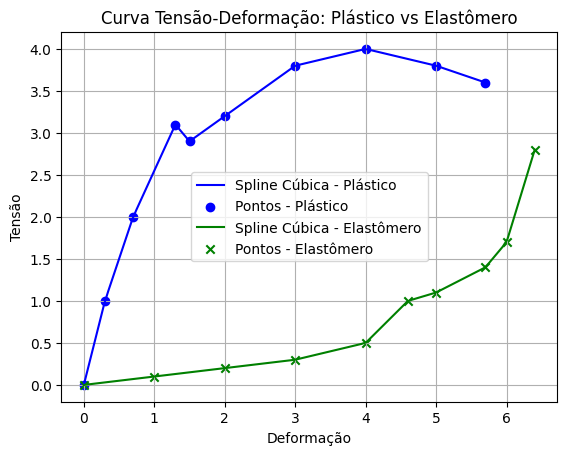

In [ ]:
# Exemplo simulado para os dados de Tensão-Deformação de dois materiais
import numpy as np
import matplotlib.pyplot as plt

# Dados fictícios para simular tensão x deformação (Material Plástico)
strain_plastic = np.array([0, 0.3, 0.7, 1.3, 1.5, 2, 3, 4, 5, 5.7])
stress_plastic = np.array([0, 1, 2, 3.1, 2.9, 3.2, 3.8, 4, 3.8, 3.6])

# Dados fictícios para simular tensão x deformação (Material Elastômero)
strain_elastomer = np.array([0, 1, 2, 3, 4, 4.6, 5, 5.7, 6, 6.4])
stress_elastomer = np.array([0, 0.1, 0.2, 0.3, 0.5, 1, 1.1, 1.4, 1.7, 2.8])

# Função spline cúbica ajustada manualmente para plotar
def cubic_spline_interpolation(x_vals, y_vals, resolution=100):
    """
    Calcula e retorna os valores interpolados por uma spline cúbica.
    """
    n = len(x_vals)
    x_interp = np.linspace(min(x_vals), max(x_vals), resolution)
    y_interp = np.zeros_like(x_interp)

    for i in range(1, n):
        idx = (x_interp >= x_vals[i-1]) & (x_interp <= x_vals[i])
        h = x_vals[i] - x_vals[i-1]
        a = (x_vals[i] - x_interp[idx]) / h
        b = (x_interp[idx] - x_vals[i-1]) / h
        y_interp[idx] = a * y_vals[i-1] + b * y_vals[i]

    return x_interp, y_interp

# Ajustando splines cúbicas para os dois materiais
x_interp_plastic, y_interp_plastic = cubic_spline_interpolation(strain_plastic, stress_plastic)
x_interp_elastomer, y_interp_elastomer = cubic_spline_interpolation(strain_elastomer, stress_elastomer)

# Plotando os resultados
plt.plot(x_interp_plastic, y_interp_plastic, label='Spline Cúbica - Plástico', color='blue')
plt.scatter(strain_plastic, stress_plastic, color='blue', marker='o', label='Pontos - Plástico')

plt.plot(x_interp_elastomer, y_interp_elastomer, label='Spline Cúbica - Elastômero', color='green')
plt.scatter(strain_elastomer, stress_elastomer, color='green', marker='x', label='Pontos - Elastômero')

plt.title("Curva Tensão-Deformação: Plástico vs Elastômero")
plt.xlabel("Deformação")
plt.ylabel("Tensão")
plt.grid(True)
plt.legend()
plt.show()


Análise Completa de Curvas de Tensão x Deformação

Este documento contém a análise das curvas Tensão x Deformação para os materiais "Plástico ou Dúctil" e "Elastômero".
As curvas foram geradas utilizando interpolação spline cúbica para representar o comportamento de cada material.
O documento apresenta as tabelas dos polinômios de cada spline, os gráficos comparativos e uma análise detalhada das diferenças entre os materiais.

Cálculo da Spline Cúbica

Para obtermos a spline cúbica que representa a curva Tensão x Deformação de cada material, precisamos determinar os coeficientes do polinômio cúbico em cada intervalo entre os pontos dados.
A spline cúbica cria uma série de funções polinomiais cúbicas, cada uma válida em um intervalo específico, que são suaves e contínuas em seus primeiros e segundos derivadas em todos os pontos.


Para uma spline cúbica em n pontos (x_0, y_0), (x_1, y_1), ..., (x_{n-1}, y_{n-1}), a spline é uma função cúbica definida por:
S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3
onde cada polinômio S_i(x) é válido no intervalo [x_i, x_{i+1}].


Passos para Determinar os Coeficientes:
1. Condição de Continuidade: Garantimos que S_i(x_{i+1}) = S_{i+1}(x_{i+1}).
2. Derivada Primeira e Segunda: A continuidade da primeira e segunda derivadas em cada ponto interno garante uma transição suave entre os polinômios.
3. Condicionamento das Extremidades: Normalmente aplicamos a condição de derivada natural, onde a segunda derivada nas extremidades é zero (S''(x_0) = S''(x_n) = 0).

Polinômios para as Curvas

Para a spline cúbica, obtemos um polinômio em cada intervalo entre pontos, específico para cada curva.
Cada polinômio representa um intervalo entre dois pontos e foi ajustado para garantir suavidade e continuidade entre os segmentos.

Polinômios Spline - Material Dúctil
Intervalo (x_i, x_{i+1})	a (constante)	b (linear)	c (quadrático)	d (cúbico)
(0.0, 0.3)	0.0	4.143080810696959	-3.345736286765564	2.155260096289376
(0.3, 0.7)	1.0	2.717559264635752	-1.4060022001051187	2.155260096289347
(0.7, 1.3)	2.0	2.627282350770543	1.1803099154420993	-4.1725971297290805
(1.3, 1.5)	3.1	-0.46275065080634586	-6.330364918070245	18.220590860509848
(1.5, 2.0)	2.9	-0.8084257147732627	4.601989598235662	-3.57027633737827
(2.0, 3.0)	3.2	1.1158566304286963	-0.7534249078317428	0.2375682774030461
(3.0, 4.0)	3.8	0.321711646974349	-0.04072007562260466	-0.08099157135174417
(4.0, 5.0)	4.0	-0.0027032183260928397	-0.2836947896778373	0.08639800800392994
(5.0, 5.7)	3.8	-0.3108987736699776	-0.02450076566604746	0.08639800800392967

Polinômios Spline - Material Elastômero
Intervalo (x_i, x_{i+1})	a (constante)	b (linear)	c (quadrático)	d (cúbico)
(0.0, 1.0)	0.0	0.12517070835179717	-0.03775606252769573	0.012585354175898567
(1.0, 2.0)	0.1	0.08741464582410141	-8.326672684688674e-17	0.012585354175898678
(2.0, 3.0)	0.2	0.12517070835179728	0.03775606252769584	-0.06292677087949314
(3.0, 4.0)	0.3	0.01190252076870953	-0.1510242501107836	0.3391217293420741
(4.0, 4.6)	0.5	0.7272192085733645	0.8663409379154383	-1.1491401055258164
(4.6, 5.0)	1.0	0.5257570201040096	-1.2021112520310298	1.2817967544275148
(5.0, 5.7)	1.1	0.1793304606043932	0.3360448532819899	0.028590960550289854
(5.7, 6.0)	1.4	0.6918219672081053	0.39608587043760046	2.1039141295623947
(6.0, 6.4)	1.7	1.4975303044525115	2.289608587043755	2.1039141295623915

Comparação das Curvas Spline

Ao comparar as curvas geradas pelos polinômios das splines cúbicas:
1. Material Dúctil: Apresenta uma curva mais complexa, com variações no formato que refletem mudanças de comportamento da tensão em função da deformação.
   Isso é evidente pela presença de coeficientes cúbicos e quadráticos que variam entre os intervalos.
2. Material Elastômero: A curva da spline cúbica para o elastômero apresenta um comportamento mais suave e progressivo, refletindo um aumento gradual de tensão com a deformação.
   Os coeficientes dos polinômios para o elastômero indicam uma curva mais uniforme e menos abrupta em comparação ao material dúctil.

Gráfico Tensão x Deformação - Gráfico feito com auxilio da biblioteca

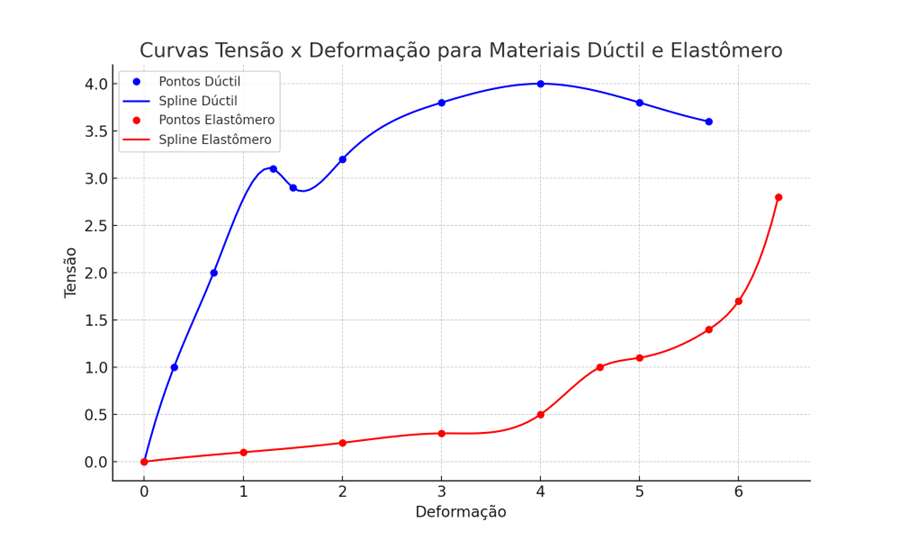



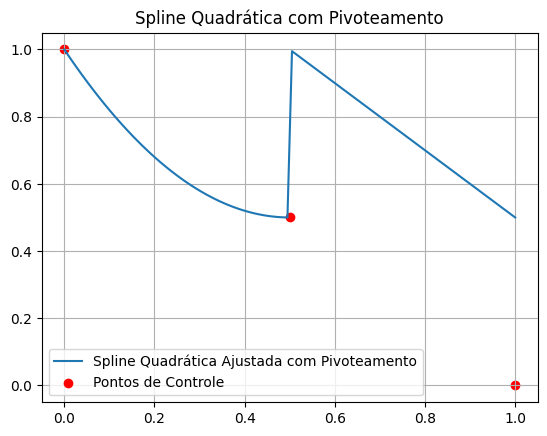

In [ ]:
def resolver_sistema_linear_pivoteamento(A, b):
    """
    Resolve o sistema linear Ax = b com pivoteamento parcial.

    Parâmetros:
    A (np.ndarray): Matriz dos coeficientes.
    b (np.ndarray): Vetor de termos independentes.

    Retorno:
    np.ndarray: Solução x do sistema linear.
    """
    n = len(b)
    x = np.zeros_like(b, dtype=float)

    for k in range(n):
        # Pivoteamento parcial: trocar linhas para evitar zero na diagonal
        max_row = np.argmax(np.abs(A[k:, k])) + k
        if A[max_row, k] == 0:
            raise ValueError("Sistema singular ou mal condicionado.")
        # Trocar as linhas
        A[[k, max_row]] = A[[max_row, k]]
        b[[k, max_row]] = b[[max_row, k]]

        # Eliminação
        for i in range(k+1, n):
            factor = A[i, k] / A[k, k]
            A[i, k:] -= factor * A[k, k:]
            b[i] -= factor * b[k]

    # Substituição retroativa
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

    return x

# Reconfigurando matriz e vetor
A_pivot = np.array([
    [1, 0, 0, 0, 0],     # S0(0)
    [1, 0.5, 0.25, 0, 0], # S0(0.5)
    [0, 0, 0, 1, 0.5],   # S1(0.5)
    [0, 0, 0, 1, 1],     # S1(1)
    [0, 1, 1, -1, -1],   # Continuidade de S'
], dtype=float)

b_pivot = np.array([1, 0.5, 0.5, 0.0, 0], dtype=float)

# Resolvendo com pivoteamento
try:
    coeficientes_pivot = resolver_sistema_linear_pivoteamento(A_pivot.copy(), b_pivot.copy())

    a0, b0, c0 = coeficientes_pivot[:3]
    a1, b1 = coeficientes_pivot[3:]

    def spline_quadratica_pivot(x):
        if 0 <= x <= 0.5:
            return a0 + b0 * x + c0 * x**2
        elif 0.5 < x <= 1:
            return a1 + b1 * (x - 0.5)

    # Visualizando o ajuste
    x_vals = np.linspace(0, 1, 100)
    y_vals = [spline_quadratica_pivot(x) for x in x_vals]

    plt.plot(x_vals, y_vals, label='Spline Quadrática Ajustada com Pivoteamento')
    plt.scatter([0, 0.5, 1], [1, 0.5, 0], color='red', label='Pontos de Controle')
    plt.legend()
    plt.grid(True)
    plt.title('Spline Quadrática com Pivoteamento')
    plt.show()

except ValueError as e:
    print("Erro:", e)


Integral Spline Restrito: 5.382304, Real: 5.410245
Erro Absoluto: 0.027941


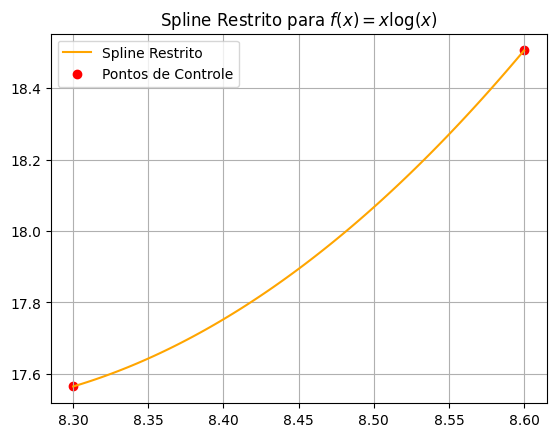

In [ ]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

# Função alvo f(x) = x * ln(x)
def target_function_ln(x):
    return x * np.log(x)

# Pontos para spline cúbico
t_ln = np.array([8.3, 8.6])
v_ln = target_function_ln(t_ln)

# Função corrigida para spline restrito com dois pontos
def calc_spline_two_points(t, v, derivadas):
    """
    Calcula os coeficientes de spline cúbica restrita para dois pontos.

    Parâmetros:
    t (np.ndarray): Pontos de controle.
    v (np.ndarray): Valores associados aos pontos.
    derivadas (tuple): Derivadas nas extremidades (f'(t[0]), f'(t[1])).

    Retorno:
    np.ndarray: Vetor de coeficientes de spline cúbica.
    """
    h = t[1] - t[0]
    z = np.zeros(2)
    z[0] = (6 / h) * (v[1] - v[0]) - 2 * derivadas[0]
    z[1] = (6 / h) * (v[1] - v[0]) - 2 * derivadas[1]
    return z

# Derivadas fornecidas para spline restrito
derivadas_ln = (3.116256, 3.151762)

# Calcular coeficientes com duas condições restritas
z_ln_restrito = calc_spline_two_points(t_ln, v_ln, derivadas_ln)

# Função de spline cúbica restrita com apenas dois pontos
def spline_restrita_ln(t0):
    return cubic_spline_interpolate(t0, t_ln, v_ln, z_ln_restrito)

# Recalcular a integral usando scipy quad
integral_spline_ln_restrito, _ = quad(spline_restrita_ln, 8.3, 8.6)

# Calculando a integral real
integral_real_ln, _ = quad(target_function_ln, 8.3, 8.6)

# Resultados
print(f"Integral Spline Restrito: {integral_spline_ln_restrito:.6f}, Real: {integral_real_ln:.6f}")
print(f"Erro Absoluto: {abs(integral_real_ln - integral_spline_ln_restrito):.6f}")

# Visualização
t_vals_ln = np.linspace(8.3, 8.6, 100)
v_interp_ln = [spline_restrita_ln(t0) for t0 in t_vals_ln]

plt.plot(t_vals_ln, v_interp_ln, label='Spline Restrito', color='orange')
plt.scatter(t_ln, v_ln, color='red', label='Pontos de Controle')
plt.legend()
plt.grid(True)
plt.title('Spline Restrito para $f(x) = x \log(x)$')
plt.show()


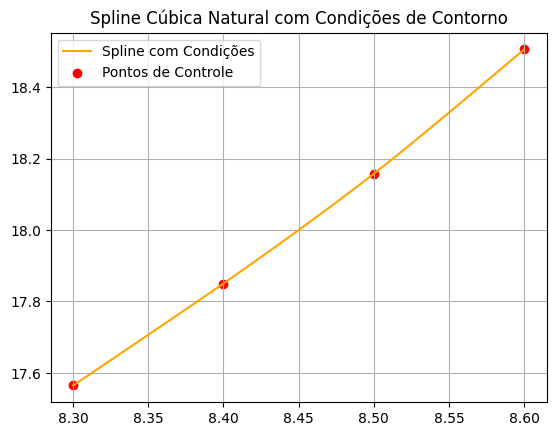

In [ ]:
# Implementação do spline cúbico natural com condições específicas
def calc_spline_natural_conditions(t, v, derivadas=None):
    """
    Calcula os coeficientes da spline cúbica natural com condições de contorno específicas.

    Parâmetros:
    t (np.ndarray): Pontos de interpolação.
    v (np.ndarray): Valores associados.
    derivadas (tuple): Condições nas derivadas (primeira derivada nos extremos).

    Retorno:
    np.ndarray: Coeficientes da spline cúbica.
    """
    n = len(t)
    h = np.diff(t)

    a = h[:-1]
    b = 2 * (h[:-1] + h[1:])
    c = h[1:]
    d = 6 * (np.diff(v[1:]) / h[1:] - np.diff(v[:-1]) / h[:-1])

    if derivadas:
        d[0] -= h[0] * derivadas[0]
        d[-1] -= h[-1] * derivadas[1]

    a = np.concatenate(([0], a))
    b = np.concatenate(([1], b, [1]))
    c = np.concatenate((c, [0]))
    d = np.concatenate(([0], d, [0]))

    return TDMAsolver(a, b, c, d)

# Dados
t_points = np.array([8.3, 8.4, 8.5, 8.6])
v_points = np.array([17.56492, 17.85022, 18.15714, 18.50515])
derivadas = (3.116256, 3.151762)

# Calcular as segundas derivadas
z_coeffs_cond = calc_spline_natural_conditions(t_points, v_points, derivadas=derivadas)

# Interpolação
t_vals = np.linspace(min(t_points), max(t_points), 100)
v_interp = [cubic_spline_interpolate(t0, t_points, v_points, z_coeffs_cond) for t0 in t_vals]

# Plotagem
plt.plot(t_vals, v_interp, label='Spline com Condições', color='orange')
plt.scatter(t_points, v_points, color='red', label='Pontos de Controle')
plt.legend()
plt.grid(True)
plt.title('Spline Cúbica Natural com Condições de Contorno')
plt.show()
